# 8.2 Moderated Regression

Moderated regression models are used to understand whether and how the relationship between two variables (a predictor $X_1$ and an outcome $Y$) changes at different levels of a third variable (the moderator $X_2$). This is accomplished by including an interaction term $(X_1*X_2)$ in the regression model:

$$Y= b_0+b_1*X_1+b_2*X_2+b_3*(X_1*X_2)$$

- $Y$ is the predicted value of the dependent variable.
- $b_0$ is the intercept.
- $b_1$ is the coefficient for the independent variable $X_1$.
- $b_2$ is the coefficient for the moderating variable $X_2$.
- $b_3$ is the coefficient for the interaction term (product of $X_1$ and $X_2$).
- $(X_1*X_2)$ is the interaction term.


## Moderator Variable

A moderator variable is a type of independent variable that influences the strength and/or direction of the relationship between another independent variable $X_1$ and a dependent variable $Y$. In other words, it "moderates" the relationship between the predictor and the outcome. This means that the effect of $X_1$ on $Y$ is not constant but varies depending on the level or value of $X_2$.

**Research question**: We investigate whether the association between fluid intelligence (`gff`) and figural working memory (`WMf`) is moderated by age (`age`).

As previously, we can use statsmodels to do so. The regression formula for moderated regression can be specified as `y ~ A * B` or as `y ~ A + B + A:B`. `A` and `B` are the main effects, `A:B` is the interaction effect. The first formula is internally automatically expanded to the second one (so if you just want to model the second interaction term you can simply use `A:B` in a standalone fashion). We will further utilize our centered dataset to obtain a meaningful intercept $b_0$.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/data.txt", delimiter='\t')
df_small = df[['age', 'subject', 'WMf', 'gff']].copy() # Create a deep copy

# Center the predictors
df_small['age_c'] = df_small['age'] - df_small['age'].mean()
df_small['WMf_c'] = df_small['WMf'] - df_small['WMf'].mean()

# Fit the model
model = smf.ols(formula='gff ~ WMf_c * age_c', data=df_small)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    gff   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     26.79
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           4.59e-15
Time:                        08:53:12   Log-Likelihood:                 118.02
No. Observations:                 255   AIC:                            -228.0
Df Residuals:                     251   BIC:                            -213.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4365      0.010     44.861      

## Interpreting the outputs

**Model overview**
- **Dependent Variable (`gff`)**: This is the outcome variable (fluid intelligence) being modeled.
- **Independent Variables**:
  - `WMf_c`: Centered working memory predictor.
  - `age_c`: Centered age predictor.
  - `WMf_c:age_c`: Interaction term between `WMf_c` and `age_c` to test for moderation.
- **R-squared (0.243)**: Approximately 24.3% of the variance in `gff` is explained by the predictors in this model.
- **Adjusted R-squared (0.233)**: The model explains 23.3% of the variance in `gff` after accounting for model complexity.

**Key Metrics**
- **F-statistic (26.79, p < 0.001)**: The model as a whole is statistically significant, meaning the predictors collectively explain a significant amount of variance in `gff`.
- **Log-Likelihood (118.02)**: Indicates the model’s goodness-of-fit; higher values suggest better fit.
- **AIC/BIC (-228.0 / -213.9)**: Measures of model quality, penalizing complexity. Lower values indicate a better model.

**Coefficients**
1. **Intercept (`0.4365`, p < 0.001)**:
   - The expected value of `gff` when both `WMf_c` and `age_c` are at their mean (since these variables are centered).
   - This is highly significant, as expected in most models.

2. **`WMf_c` (`0.7489`, p < 0.001)**:
   - A **positive, significant effect**.
   - For every unit increase in centered working memory (`WMf_c`), `gff` increases by approximately 0.75 units, holding `age_c` constant.

3. **`age_c` (`-0.0055`, p = 0.006)**:
   - A **negative, significant effect**.
   - For every unit increase in centered age (`age_c`), `gff` decreases by 0.0055 units, holding `WMf_c` constant.

4. **Interaction Term `WMf_c:age_c` (`0.0181`, p = 0.345)**:
   - This term is **not significant** (p = 0.345), suggesting no evidence that the relationship between `WMf_c` and `gff` changes significantly as a function of `age_c`.
   - In other words, age does **not moderate** the relationship between working memory and fluid intelligence in this sample.

**Summary of findings**
1. **Main Effects**:
   - `WMf_c`: A strong, positive predictor of `gff` (fluid intelligence). Higher working memory scores are associated with higher fluid intelligence.
   - `age_c`: A small, negative predictor of `gff`. Older age is associated with slightly lower fluid intelligence.

2. **Interaction**:
   - The interaction term (`WMf_c:age_c`) is not statistically significant, indicating that the effect of working memory on fluid intelligence does not vary significantly across different ages.

3. **Model Fit**:
   - The model explains a modest proportion of the variance in `gff` (24.3%), and the predictors collectively contribute significantly.

The regression equation can be written as:

$$\text{gff}=0.44+0.75*\text{WMf_c}-0.0055*\text{age_c}+0.018*\text{WMf_c}*\text{age_c}$$

The following plot illustrates the relationship between `WMf`, `gff` and `age` as their moderator (please note that the regression line is only a simple linear regression!).

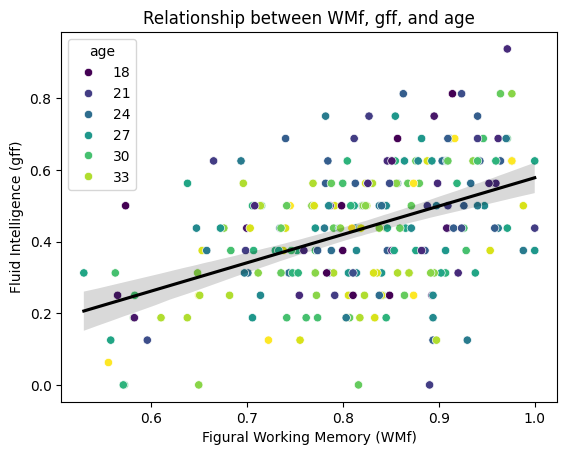

In [2]:
import matplotlib as mpl

fig, ax = plt.subplots()
sns.scatterplot(data=df_small, x='WMf', y='gff', hue='age', palette='viridis', ax=ax)
sns.regplot(data=df_small, x='WMf', y='gff', scatter=False, color='black', ax=ax)
ax.set(xlabel='Figural Working Memory (WMf)', ylabel='Fluid Intelligence (gff)', title='Relationship between WMf, gff, and age')

plt.show()